In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 2 años en adelante hay que aplicar bootstraping (HAY QUE PASAR A TASA 0 CUPÓN)
# Hacer matriz de diferencias (Delta X = X_i - X_i-1)
# Graficar 1M VS TPM (BUSCAR EXCEL EN EL BANCO CENTRAL)

In [2]:
df = pd.read_excel("swap_camara_df.xlsx", sheet_name=0)
df = df.drop(df.index[0])
df = df.dropna().reset_index(drop=True)
df = df.rename(columns={"Unnamed: 0": "Fecha"})
df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce", dayfirst=True)
df

Fecha CHSWPA ICCH Curncy CHSWPB ICCH Curncy CHSWPC ICCH Curncy  \
0    2021-07-21               0.63              0.735               0.89   
1    2021-07-22               0.72               0.82              0.915   
2    2021-07-23              0.745               0.82              0.915   
3    2021-07-26              0.745               0.83              0.935   
4    2021-07-27              0.755               0.85               0.98   
...         ...                ...                ...                ...   
1037 2025-09-09               4.74              4.725              4.695   
1038 2025-09-10               4.76               4.76              4.745   
1039 2025-09-11               4.76              4.755               4.75   
1040 2025-09-12              4.765              4.765               4.78   
1041 2025-09-15               4.76               4.75              4.755   

     CHSWPF ICCH Curncy CHSWPI ICCH Curncy CHSWP1 ICCH Curncy  \
0                 1.205               1.46               1.71   
1                  1.21              1.465               1.72   
2                  1.21               1.46              1.715   
3                 1.245              1.495              1.745   
4                  1.31              1.575               1.82   
...                 ...                ...                ...   
1037              4.625              4.575               4.55   
1038              4.695              4.645               4.62   
1039              4.685              4.635                4.6   
1040               4.71               4.68               4.65   
1041              4.675              4.645               4.62   

     CHSWP1F ICCH Curncy CHSWP2 ICCH Curncy CHSWP3 ICCH Curncy  \
0                  2.075               2.34              2.685   
1                   2.08               2.33               2.67   
2                   2.07              2.315               2.65   
3                  2.115              2.355               2.69   
4                  2.205              2.475               2.83   
...                  ...                ...                ...   
1037               4.535               4.44              4.535   
1038               4.605                4.5               4.58   
1039               4.585              4.475              4.555   
1040                4.63               4.52              4.595   
1041               4.605                4.5              4.575   

     CHSWP4 ICCH Curncy CHSWP5 ICCH Curncy CHSWP7 ICCH Curncy  \
0                 2.985              3.255               3.72   
1                  2.95              3.215              3.675   
2                  2.93              3.195               3.65   
3                  2.98              3.245                3.7   
4                  3.13               3.39              3.855   
...                 ...                ...                ...   
1037               4.63               4.73              4.925   
1038              4.655              4.745              4.935   
1039               4.63              4.715                4.9   
1040               4.67              4.765               4.95   
1041              4.655              4.745               4.93   

     CHSWP10 ICCH Curncy CHSWP12 ICCH Curncy CHSWP15 ICCH Curncy  \
0                   4.05                4.24               4.365   
1                  4.015                 4.2                4.32   
2                  4.005               4.185                4.32   
3                   4.05               4.215               4.335   
4                   4.22                4.39                 4.5   
...                  ...                 ...                 ...   
1037               5.175                5.29                 5.4   
1038               5.185                 5.3                5.41   
1039               5.145               5.255               5.365   
1040               5.185               5.295               5.4

In [3]:
Tenor = {"1M"  : "CHSWPA ICCH Curncy" , "2M" : "CHSWPB ICCH Curncy" , 
         "3M"  : "CHSWPC ICCH Curncy" , "6M" : "CHSWPF ICCH Curncy" , 
         "9M"  : "CHSWPI ICCH Curncy" , "1Y" : "CHSWP1 ICCH Curncy" ,
         "1Y6M": "CHSWP1F ICCH Curncy", "2Y" : "CHSWP2 ICCH Curncy" ,
         "3Y"  : "CHSWP3 ICCH Curncy" , "4Y" : "CHSWP4 ICCH Curncy" ,
         "5Y"  : "CHSWP5 ICCH Curncy" , "7Y" : "CHSWP7 ICCH Curncy" , 
         "10Y" : "CHSWP10 ICCH Curncy", "12Y": "CHSWP12 ICCH Curncy", 
         "15Y" : "CHSWP15 ICCH Curncy", "20Y": "CHSWP20 ICCH Curncy", 
         "25Y" : "CHSWP25 ICCH Curncy"}

In [ ]:
df_DF 

<Axes: >

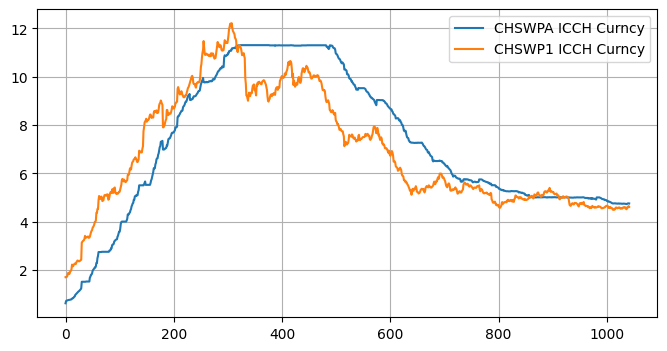

In [12]:
c1 = Tenor["1M"]
c2 = Tenor["1Y"]

df[[c1, c2]].plot(figsize=(8,4), grid=True)

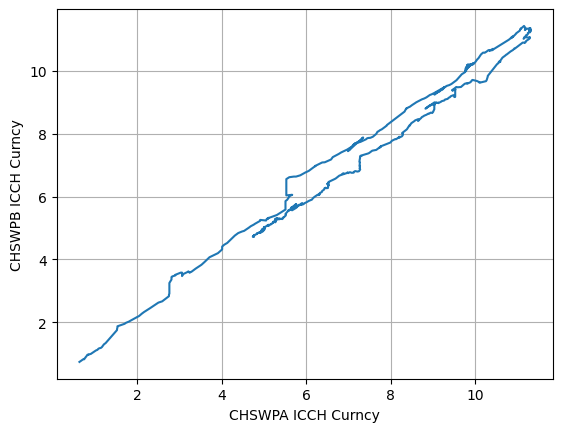

In [13]:
c1 = Tenor["1M"]  # x
c2 = Tenor["2M"]  # y

fig, ax = plt.subplots()
ax.plot(df[c1], df[c2])  # o ax.scatter(df[c1], df[c2])
ax.set_xlabel(c1)
ax.set_ylabel(c2)
ax.grid(True)
plt.show()

In [14]:
ss = StandardScaler()

In [15]:
X_cols = df.columns.tolist()[1:]
X_cols

['CHSWPA ICCH Curncy',
 'CHSWPB ICCH Curncy',
 'CHSWPC ICCH Curncy',
 'CHSWPF ICCH Curncy',
 'CHSWPI ICCH Curncy',
 'CHSWP1 ICCH Curncy',
 'CHSWP1F ICCH Curncy',
 'CHSWP2 ICCH Curncy',
 'CHSWP3 ICCH Curncy',
 'CHSWP4 ICCH Curncy',
 'CHSWP5 ICCH Curncy',
 'CHSWP7 ICCH Curncy',
 'CHSWP10 ICCH Curncy',
 'CHSWP12 ICCH Curncy',
 'CHSWP15 ICCH Curncy',
 'CHSWP20 ICCH Curncy',
 'CHSWP25 ICCH Curncy']

In [16]:
df.head()

Fecha CHSWPA ICCH Curncy CHSWPB ICCH Curncy CHSWPC ICCH Curncy  \
0 2021-07-21               0.63              0.735               0.89   
1 2021-07-22               0.72               0.82              0.915   
2 2021-07-23              0.745               0.82              0.915   
3 2021-07-26              0.745               0.83              0.935   
4 2021-07-27              0.755               0.85               0.98   

  CHSWPF ICCH Curncy CHSWPI ICCH Curncy CHSWP1 ICCH Curncy  \
0              1.205               1.46               1.71   
1               1.21              1.465               1.72   
2               1.21               1.46              1.715   
3              1.245              1.495              1.745   
4               1.31              1.575               1.82   

  CHSWP1F ICCH Curncy CHSWP2 ICCH Curncy CHSWP3 ICCH Curncy  \
0               2.075               2.34              2.685   
1                2.08               2.33               2.67   
2                2.07              2.315               2.65   
3               2.115              2.355               2.69   
4               2.205              2.475               2.83   

  CHSWP4 ICCH Curncy CHSWP5 ICCH Curncy CHSWP7 ICCH Curncy  \
0              2.985              3.255               3.72   
1               2.95              3.215              3.675   
2               2.93              3.195               3.65   
3               2.98              3.245                3.7   
4               3.13               3.39              3.855   

  CHSWP10 ICCH Curncy CHSWP12 ICCH Curncy CHSWP15 ICCH Curncy  \
0                4.05                4.24               4.365   
1               4.015                 4.2                4.32   
2               4.005               4.185                4.32   
3                4.05               4.215               4.335   
4                4.22                4.39                 4.5   

  CHSWP20 ICCH Curncy CHSWP25 ICCH Curncy  
0                4.55                4.65  
1                4.49                4.59  
2               4.485               4.585  
3                 4.5                 4.6  
4               4.675               4.775

In [17]:
df[X_cols] = ss.fit_transform(df[X_cols])

In [18]:
df.head()

Fecha  CHSWPA ICCH Curncy  CHSWPB ICCH Curncy  CHSWPC ICCH Curncy  \
0 2021-07-21           -2.210158           -2.217134           -2.206772   
1 2021-07-22           -2.179675           -2.187995           -2.198057   
2 2021-07-23           -2.171208           -2.187995           -2.198057   
3 2021-07-26           -2.171208           -2.184567           -2.191085   
4 2021-07-27           -2.167821           -2.177710           -2.175397   

   CHSWPF ICCH Curncy  CHSWPI ICCH Curncy  CHSWP1 ICCH Curncy  \
0           -2.175684           -2.160924           -2.145675   
1           -2.173862           -2.158989           -2.141517   
2           -2.173862           -2.160924           -2.143596   
3           -2.161101           -2.147377           -2.131124   
4           -2.137404           -2.116411           -2.099943   

   CHSWP1F ICCH Curncy  CHSWP2 ICCH Curncy  CHSWP3 ICCH Curncy  \
0            -2.148964           -2.211969           -2.394169   
1            -2.146560           -2.217927           -2.406093   
2            -2.151369           -2.226865           -2.421992   
3            -2.129731           -2.203032           -2.390194   
4            -2.086456           -2.131533           -2.278904   

   CHSWP4 ICCH Curncy  CHSWP5 ICCH Curncy  CHSWP7 ICCH Curncy  \
0           -2.523502           -2.558951           -2.474831   
1           -2.558292           -2.605714           -2.540689   
2           -2.578171           -2.629095           -2.577277   
3           -2.528472           -2.570641           -2.504102   
4           -2.379374           -2.401125           -2.277258   

   CHSWP10 ICCH Curncy  CHSWP12 ICCH Curncy  CHSWP15 ICCH Curncy  \
0            -2.509059            -2.384386            -2.331238   
1            -2.572032            -2.460112            -2.419376   
2            -2.590024            -2.488509            -2.419376   
3            -2.509059            -2.431715            -2.389997   
4            -2.203193            -2.100416            -2.066824   

   CHSWP20 ICCH Curncy  CHSWP25 ICCH Curncy  
0            -2.106349            -1.928215  
1            -2.226091            -2.046353  
2            -2.236070            -2.056198  
3            -2.206134            -2.026664  
4            -1.856886            -1.682093

In [39]:
pca2 = PCA(n_components = 2, random_state = 42)

In [40]:
pca_2 = pca2.fit_transform(df[X_cols])

In [41]:
pca_2

array([[-9.37292616,  0.13012403],
       [-9.5035102 ,  0.31507316],
       [-9.54698408,  0.34547418],
       ...,
       [-3.11618428, -0.72086907],
       [-2.9496708 , -0.83492404],
       [-3.0497629 , -0.76580446]])

In [42]:
df_2 = pd.DataFrame({"PCA1":pca_2[:,0], "PCA2": pca_2[:,1], "Fecha": df["Fecha"]})

In [43]:
df_2

PCA1      PCA2      Fecha
0    -9.372926  0.130124 2021-07-21
1    -9.503510  0.315073 2021-07-22
2    -9.546984  0.345474 2021-07-23
3    -9.414518  0.274199 2021-07-26
4    -8.810181 -0.250705 2021-07-27
...        ...       ...        ...
1037 -3.075145 -0.848846 2025-09-09
1038 -2.979953 -0.850305 2025-09-10
1039 -3.116184 -0.720869 2025-09-11
1040 -2.949671 -0.834924 2025-09-12
1041 -3.049763 -0.765804 2025-09-15

[1042 rows x 3 columns]

In [44]:
pca2.explained_variance_ratio_

array([0.78568522, 0.20247024])

<Axes: xlabel='PCA1', ylabel='PCA2'>

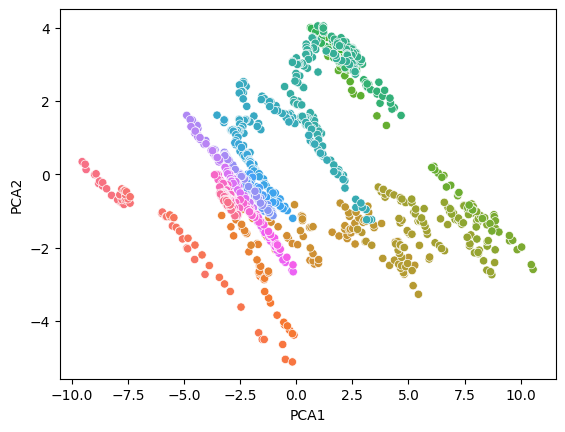

In [51]:
sns.scatterplot(x="PCA1", y="PCA2", hue="Fecha", data=df_2, legend = False)

<Axes: >

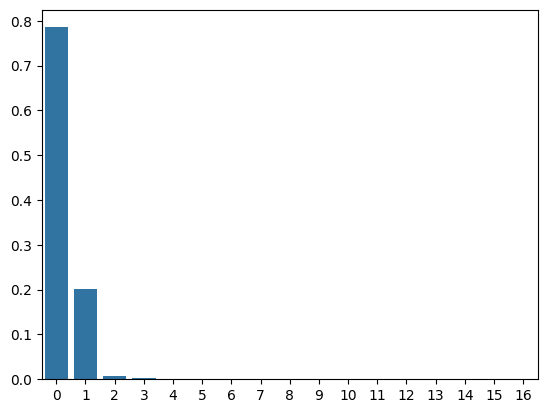

In [38]:
sns.barplot(x=[i for i in range(17)], y=pca2.explained_variance_ratio_)

In [53]:
pca3 = PCA(n_components = 3, random_state = 42)

In [54]:
pca_3 = pca3.fit_transform(df[X_cols])
pca_3

array([[-9.37292616,  0.13012403, -0.72438447],
       [-9.5035102 ,  0.31507316, -0.76243514],
       [-9.54698408,  0.34547418, -0.75172728],
       ...,
       [-3.11618428, -0.72086907,  0.21045045],
       [-2.9496708 , -0.83492404,  0.23416578],
       [-3.0497629 , -0.76580446,  0.20488721]])

In [55]:
df_3 = pd.DataFrame({"PCA1":pca_3[:,0], "PCA2": pca_3[:,1], "PCA3": pca_3[:,2], "Fecha": df["Fecha"]})
df_3

PCA1      PCA2      PCA3      Fecha
0    -9.372926  0.130124 -0.724384 2021-07-21
1    -9.503510  0.315073 -0.762435 2021-07-22
2    -9.546984  0.345474 -0.751727 2021-07-23
3    -9.414518  0.274199 -0.757429 2021-07-26
4    -8.810181 -0.250705 -0.587191 2021-07-27
...        ...       ...       ...        ...
1037 -3.075145 -0.848846  0.276512 2025-09-09
1038 -2.979953 -0.850305  0.257755 2025-09-10
1039 -3.116184 -0.720869  0.210450 2025-09-11
1040 -2.949671 -0.834924  0.234166 2025-09-12
1041 -3.049763 -0.765804  0.204887 2025-09-15

[1042 rows x 4 columns]

In [56]:
pca3.explained_variance_ratio_

array([0.78568522, 0.20247024, 0.00837611])

NameError: name 'cats' is not defined

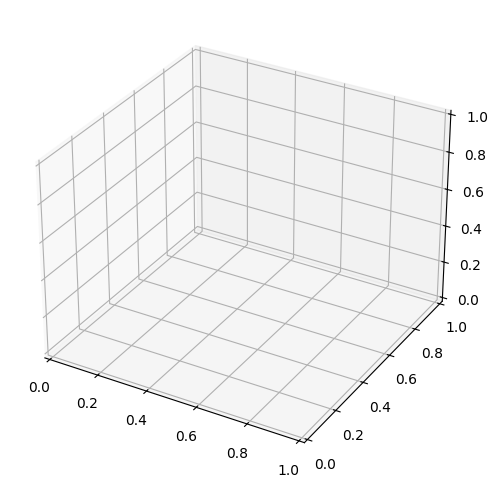

In [57]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Si quieres color continuo por fecha (orden temporal):
fecha_num = pd.to_datetime(df_2["Fecha"]).map(pd.Timestamp.toordinal)
sc = ax.scatter(pca_3[:,0], pca_3[:,1], pca_3[:,2], c=cats.codes, s=25)

# Si quieres color por categorías (p.ej., Fecha como string o clase):
# cats = pd.Categorical(df_3["Fecha"])
# sc = ax.scatter(pca_3[:,0], pca_3[:,1], pca_3[:,2], c=cats.codes, s=25)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA 3D')

# Leyenda categórica
handles = [plt.Line2D([0],[0], marker='o', linestyle='', label=lab) 
           for lab in cats.categories]
ax.legend(handles=handles, title='Fecha', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [58]:
# Z: tu matriz con 3 PCs (n_samples x 3)
assert pca_3.shape[1] == 3, "Z debe tener 3 columnas (PC1, PC2, PC3)."

df_plot = pd.DataFrame(pca_3, columns=['PC1','PC2','PC3'])
if 'Fecha' in df_2.columns:
    df_plot['Fecha'] = df_2['Fecha']

# Filtra filas con NaN o inf
mask = np.isfinite(df_plot[['PC1','PC2','PC3']]).all(axis=1)
df_plot = df_plot[mask]
assert len(df_plot) > 0, "No hay puntos válidos para graficar (NaN/inf)."

import plotly.io as pio
# Prueba en este orden:
for r in ["notebook_connected", "jupyterlab", "vscode", "browser"]:
    try:
        pio.renderers.default = r
        break
    except Exception:
        pass


import plotly.express as px

fig = px.scatter_3d(
    df_plot,
    x='PC1', y='PC2', z='PC3',
    color='Fecha' if 'Fecha' in df_plot.columns else None,
    title='PCA 3D',
    labels={'PC1':'PC1','PC2':'PC2','PC3':'PC3'},
    width=800, height=600
)
fig.update_traces(marker=dict(size=4))
fig.show()

<Axes: >

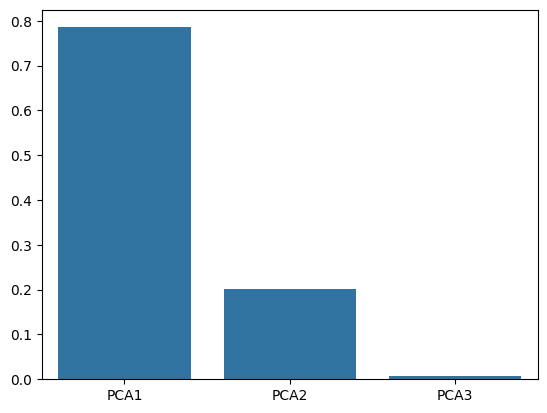

In [80]:
sns.barplot(x=["PCA1","PCA2","PCA3"], y=pca3.explained_variance_ratio_)

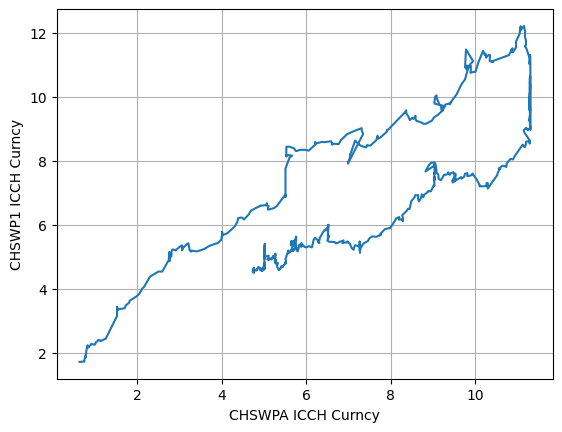

In [83]:
c1 = Tenor["1M"]  # x
c2 = Tenor["1Y"]  # y

fig, ax = plt.subplots()
ax.plot(df[c1], df[c2])  # o ax.scatter(df[c1], df[c2])
ax.set_xlabel(c1)
ax.set_ylabel(c2)
ax.grid(True)
plt.show()

In [27]:
# Matrices útiles
eigvec = pca2.components_.T                    # (n_features x n_components) = e_{jk}
eigval = pca2.explained_variance_              # lambda_k
expl_ratio = pca2.explained_variance_ratio_    # % varianza por PC

print(eigval,expl_ratio)

[13.36947933  3.44530056] [0.78568522 0.20247024]


In [59]:
contrib_var_to_pc = (eigvec**2)
contrib_var_to_pc = contrib_var_to_pc / contrib_var_to_pc.sum(axis=0)

contrib_var_to_pc_df = pd.DataFrame(contrib_var_to_pc,columns=[f'PC{k+1}' for k in range(eigvec.shape[1])])
contrib_var_to_pc_df["Tenor"] = ['CHSWPA ICCH Curncy',
 'CHSWPB ICCH Curncy',
 'CHSWPC ICCH Curncy',
 'CHSWPF ICCH Curncy',
 'CHSWPI ICCH Curncy',
 'CHSWP1 ICCH Curncy',
 'CHSWP1F ICCH Curncy',
 'CHSWP2 ICCH Curncy',
 'CHSWP3 ICCH Curncy',
 'CHSWP4 ICCH Curncy',
 'CHSWP5 ICCH Curncy',
 'CHSWP7 ICCH Curncy',
 'CHSWP10 ICCH Curncy',
 'CHSWP12 ICCH Curncy',
 'CHSWP15 ICCH Curncy',
 'CHSWP20 ICCH Curncy',
 'CHSWP25 ICCH Curncy']
contrib_var_to_pc_df["Tenor"] = contrib_var_to_pc_df["Tenor"].map()

TypeError: Series.map() missing 1 required positional argument: 'arg'

In [60]:
contrib_var_to_pc_df

PC1       PC2                Tenor
0   0.040903  0.121847   CHSWPA ICCH Curncy
1   0.045040  0.110398   CHSWPB ICCH Curncy
2   0.048298  0.100378   CHSWPC ICCH Curncy
3   0.055907  0.073037   CHSWPF ICCH Curncy
4   0.061683  0.049558   CHSWPI ICCH Curncy
5   0.065883  0.031708   CHSWP1 ICCH Curncy
6   0.070391  0.012837  CHSWP1F ICCH Curncy
7   0.072437  0.004986   CHSWP2 ICCH Curncy
8   0.074020  0.000018   CHSWP3 ICCH Curncy
9   0.073446  0.002949   CHSWP4 ICCH Curncy
10  0.071229  0.011911   CHSWP5 ICCH Curncy
11  0.065589  0.034591   CHSWP7 ICCH Curncy
12  0.057096  0.066329  CHSWP10 ICCH Curncy
13  0.053995  0.078616  CHSWP12 ICCH Curncy
14  0.051297  0.088535  CHSWP15 ICCH Curncy
15  0.047684  0.102453  CHSWP20 ICCH Curncy
16  0.045101  0.109851  CHSWP25 ICCH Curncy

In [61]:
loadings = pca2.components_.T                  # shape: (n_variables, n_PCs) → e_{jk}
corr_loadings = loadings * np.sqrt(pca2.explained_variance_)  # correlaciones var–PC

In [62]:
pca2.explained_variance_

array([13.36947933,  3.44530056])

In [63]:
loadings

array([[ 0.20224423,  0.34906524],
       [ 0.21222678,  0.3322615 ],
       [ 0.21976853,  0.31682519],
       [ 0.23644752,  0.27025297],
       [ 0.24836147,  0.22261634],
       [ 0.25667631,  0.17806874],
       [ 0.2653131 ,  0.11329941],
       [ 0.26914198,  0.07061383],
       [ 0.27206537,  0.00419491],
       [ 0.27100992, -0.05430519],
       [ 0.26688823, -0.10913556],
       [ 0.25610274, -0.1859853 ],
       [ 0.23894856, -0.25754328],
       [ 0.23236754, -0.28038549],
       [ 0.22648843, -0.29754865],
       [ 0.21836582, -0.32008204],
       [ 0.21237049, -0.3314382 ]])

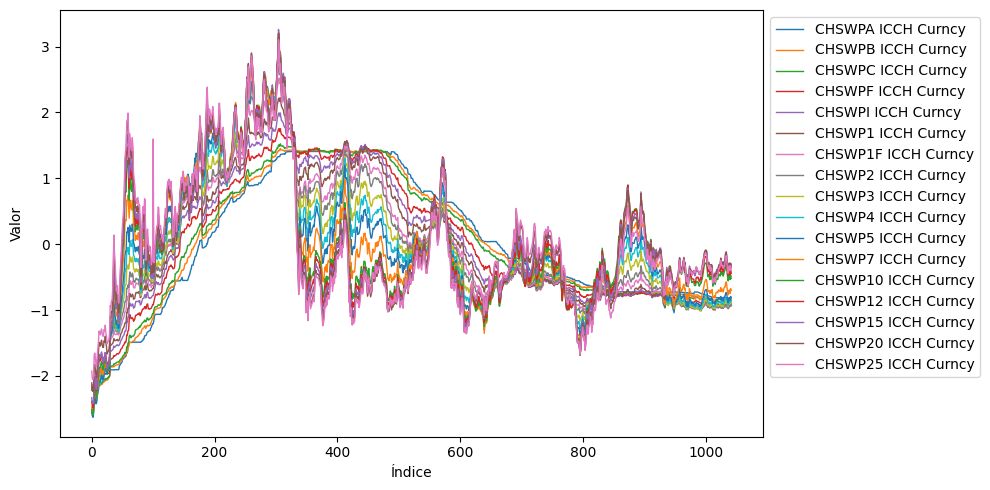

In [64]:
import matplotlib.pyplot as plt

cols = df.columns[1:]          # o una lista específica
ax = df[cols].plot(figsize=(10,5), linewidth=1)
ax.set_xlabel("Índice")
ax.set_ylabel("Valor")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))  # leyenda afuera
plt.tight_layout()
plt.show()

In [65]:
loadings[:, 0] 


array([0.20224423, 0.21222678, 0.21976853, 0.23644752, 0.24836147,
       0.25667631, 0.2653131 , 0.26914198, 0.27206537, 0.27100992,
       0.26688823, 0.25610274, 0.23894856, 0.23236754, 0.22648843,
       0.21836582, 0.21237049])

/var/folders/k6/x0pwglw92_74wdc5stx1kj0m0000gn/T/ipykernel_96766/1451543021.py:31: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



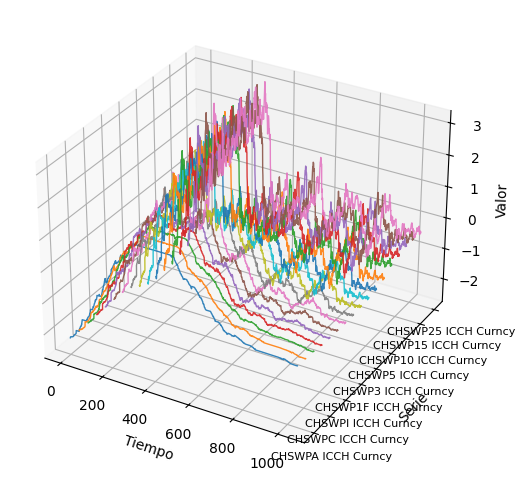

In [156]:
import numpy as np
import matplotlib.pyplot as plt

cols = df.columns[1:]  # tus 17 series
# Eje X: tiempo (numérico). Si el índice es datetime, pásalo a días desde el inicio.
if np.issubdtype(df.index.dtype, np.datetime64):
    t = (df.index - df.index.min()) / np.timedelta64(1, 'D')
    t = t.astype(float)
else:
    t = np.arange(len(df), dtype=float)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

for i, c in enumerate(cols):
    y = np.full_like(t, i, dtype=float)        # offset por serie (profundidad)
    z = df[c].values
    ax.plot(t, y, z, lw=1, alpha=0.9)
    # Opcional: “cortina” hasta z=0 para efecto relieve
    # ax.plot(np.r_[t, t[::-1]], np.r_[y, y[::-1]], np.r_[z, np.zeros_like(z)], alpha=0.15)

ax.set_xlabel("Tiempo")
ax.set_ylabel("Serie")
ax.set_zlabel("Valor")

# ticks con nombres (si son muchos, muestra algunos)
step = max(1, len(cols)//8)
ax.set_yticks(np.arange(0, len(cols), step))
ax.set_yticklabels(cols[::step], fontsize=8)

plt.tight_layout()
plt.show()


/var/folders/k6/x0pwglw92_74wdc5stx1kj0m0000gn/T/ipykernel_96766/2446643669.py:16: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/var/folders/k6/x0pwglw92_74wdc5stx1kj0m0000gn/T/ipykernel_96766/2446643669.py:33: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



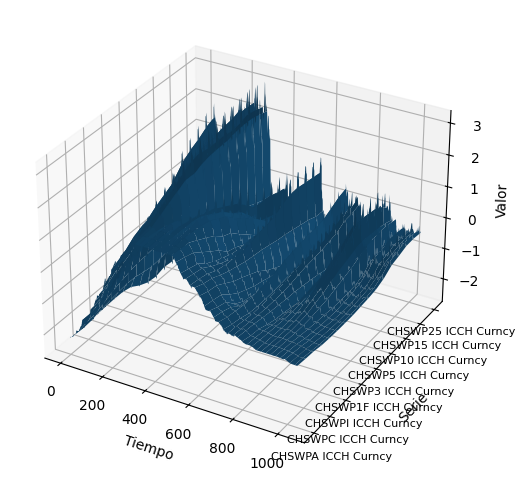

In [157]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

cols = df.columns[1:]
M = df[cols].copy()

# Si el índice es datetime → a días
if np.issubdtype(M.index.dtype, np.datetime64):
    x = (M.index - M.index.min()) / np.timedelta64(1, 'D')
    x = x.astype(float)
else:
    x = np.arange(len(M), dtype=float)

# Si hay NaN, interpola por columna
M = M.interpolate().fillna(method='bfill').fillna(method='ffill')

Xg, Yg = np.meshgrid(x, np.arange(len(cols)), indexing='ij')
Z = M.to_numpy()  # shape: (n_tiempos, n_series)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Xg, Yg, Z, linewidth=0, antialiased=True)

ax.set_xlabel("Tiempo")
ax.set_ylabel("Serie")
ax.set_zlabel("Valor")

step = max(1, len(cols)//8)
ax.set_yticks(np.arange(0, len(cols), step))
ax.set_yticklabels(cols[::step], fontsize=8)

plt.tight_layout()
plt.show()


In [158]:
import pandas as pd
import plotly.express as px
import numpy as np

cols = df.columns[1:]
tmp = df[cols].copy()
tmp['x'] = df.index

# derretir a formato largo
long = tmp.melt(id_vars='x', var_name='serie', value_name='valor')

# x numérico si es datetime
if np.issubdtype(long['x'].dtype, np.datetime64):
    long['x'] = (pd.to_datetime(long['x']) - long['x'].min()).dt.total_seconds()/86400.0

fig = px.line_3d(long, x='x', y='serie', z='valor', color='serie',
                 labels={'x':'Tiempo (días)','serie':'Serie','valor':'Valor'},
                 title='Series en 3D')
fig.update_traces(line=dict(width=2))
fig.show()


/var/folders/k6/x0pwglw92_74wdc5stx1kj0m0000gn/T/ipykernel_96766/1127362558.py:33: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



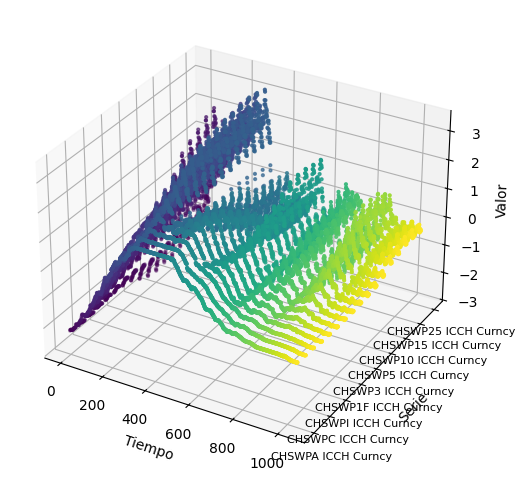

In [159]:
import numpy as np
import matplotlib.pyplot as plt

cols = df.columns[1:]

# eje X (tiempo) en escala numérica
if np.issubdtype(df.index.dtype, np.datetime64):
    t = (df.index - df.index.min()) / np.timedelta64(1, 'D')
    t = t.astype(float)
else:
    t = np.arange(len(df), dtype=float)

# normaliza t a [0,1] para que el gradiente sea comparable entre series
t01 = (t - t.min()) / (t.max() - t.min() + 1e-12)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

for i, c in enumerate(cols):
    y = np.full_like(t01, i, dtype=float)
    z = df[c].to_numpy()
    # puntos muy juntos → efecto de línea con gradiente
    sc = ax.scatter(t, y, z, c=t01, s=4, cmap='viridis')  # cambia 'viridis' si quieres

ax.set_xlabel("Tiempo")
ax.set_ylabel("Serie")
ax.set_zlabel("Valor")

step = max(1, len(cols)//8)
ax.set_yticks(np.arange(0, len(cols), step))
ax.set_yticklabels(cols[::step], fontsize=8)

plt.tight_layout()
plt.show()


/var/folders/k6/x0pwglw92_74wdc5stx1kj0m0000gn/T/ipykernel_96766/11174135.py:7: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/var/folders/k6/x0pwglw92_74wdc5stx1kj0m0000gn/T/ipykernel_96766/11174135.py:22: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

/var/folders/k6/x0pwglw92_74wdc5stx1kj0m0000gn/T/ipykernel_96766/11174135.py:39: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



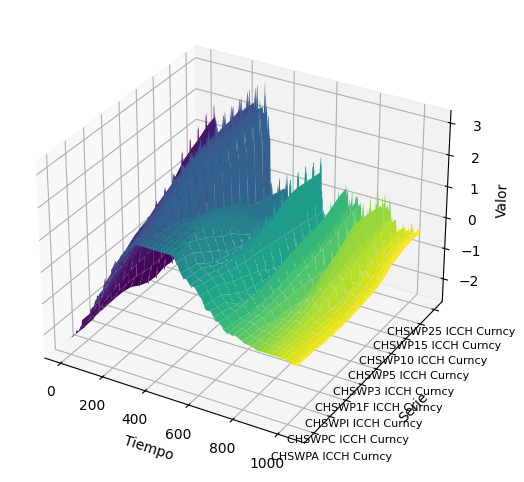

In [160]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

cols = df.columns[1:]
M = df[cols].copy().interpolate().fillna(method='bfill').fillna(method='ffill')

# X (tiempo) numérico
if np.issubdtype(M.index.dtype, np.datetime64):
    x = (M.index - M.index.min()) / np.timedelta64(1, 'D')
    x = x.astype(float)
else:
    x = np.arange(len(M), dtype=float)

Xg, Yg = np.meshgrid(x, np.arange(len(cols)), indexing='ij')
Z = M.to_numpy()

# Gradiente por tiempo: normaliza x y crea facecolors
t01 = (x - x.min()) / (x.max() - x.min() + 1e-12)
norm = mcolors.Normalize(vmin=0, vmax=1)
cmap = cm.get_cmap('viridis')
# expandimos t01 a la rejilla (mismo color por fila de tiempo)
C = cmap(norm(np.repeat(t01[:, None], len(cols), axis=1)))

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(Xg, Yg, Z, facecolors=C, linewidth=0, antialiased=True, shade=False)

ax.set_xlabel("Tiempo")
ax.set_ylabel("Serie")
ax.set_zlabel("Valor")

step = max(1, len(cols)//8)
ax.set_yticks(np.arange(0, len(cols), step))
ax.set_yticklabels(cols[::step], fontsize=8)

plt.tight_layout()
plt.show()


In [162]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

cols = df.columns[1:]

# tiempo numérico
if np.issubdtype(df.index.dtype, np.datetime64):
    t = (pd.to_datetime(df.index) - pd.to_datetime(df.index).min()).total_seconds() / 86400.0
else:
    t = np.arange(len(df), dtype=float)

# normaliza para que el gradiente sea consistente
t01 = (t - t.min()) / (t.max() - t.min() + 1e-12)

fig = go.Figure()

for i, c in enumerate(cols):
    y = np.full_like(t01, i, dtype=float)
    z = df[c].to_numpy()

    fig.add_trace(go.Scatter3d(
        x=t, y=y, z=z,
        mode='lines',
        name=str(c),
        line=dict(color=t01, colorscale='Viridis', width=4),  # gradiente
        hovertemplate=f"Serie: {c}<br>t=%{{x:.2f}}<br>valor=%{{z:.4f}}<extra></extra>"
    ))

fig.update_layout(
    width=1000, height=600,
    scene=dict(
        xaxis_title='Tiempo (días)',
        yaxis_title='Serie',
        zaxis_title='Valor',
        yaxis=dict(
            tickmode='array',
            tickvals=list(range(len(cols)))[::max(1, len(cols)//8)],
            ticktext=cols[::max(1, len(cols)//8)]
        )
    ),
    legend=dict(itemsizing='trace', orientation='h', y=-0.1)
)

fig.show()


/var/folders/k6/x0pwglw92_74wdc5stx1kj0m0000gn/T/ipykernel_96766/3366462319.py:18: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

/var/folders/k6/x0pwglw92_74wdc5stx1kj0m0000gn/T/ipykernel_96766/3366462319.py:35: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



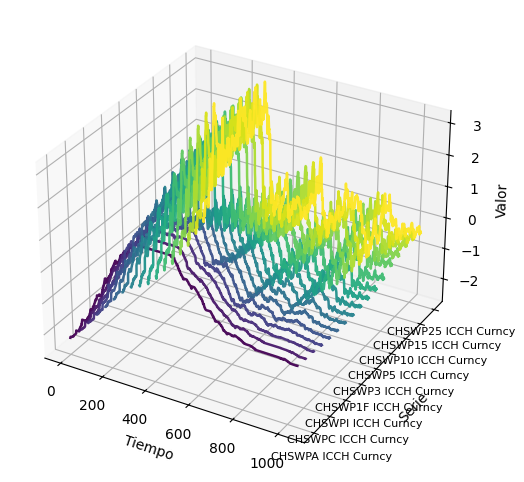

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

cols = df.columns[1:]
N = len(cols)

# tiempo numérico
if np.issubdtype(df.index.dtype, np.datetime64):
    t = (df.index - df.index.min()) / np.timedelta64(1, 'D')
    t = t.astype(float)
else:
    t = np.arange(len(df), dtype=float)

# gradiente por serie
norm = mcolors.Normalize(vmin=0, vmax=N-1)
cmap = cm.get_cmap('viridis')  # prueba también 'plasma','magma','cividis','turbo'

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

for i, c in enumerate(cols):
    y = np.full_like(t, i, dtype=float)
    z = df[c].to_numpy()
    color = cmap(norm(i))
    ax.plot(t, y, z, lw=1.8, color=color, alpha=0.95)

ax.set_xlabel("Tiempo")
ax.set_ylabel("Serie")
ax.set_zlabel("Valor")
step = max(1, N//8)
ax.set_yticks(np.arange(0, N, step))
ax.set_yticklabels(cols[::step], fontsize=8)
plt.tight_layout(); plt.show()


/var/folders/k6/x0pwglw92_74wdc5stx1kj0m0000gn/T/ipykernel_96766/2087451467.py:8: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/var/folders/k6/x0pwglw92_74wdc5stx1kj0m0000gn/T/ipykernel_96766/2087451467.py:23: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

/var/folders/k6/x0pwglw92_74wdc5stx1kj0m0000gn/T/ipykernel_96766/2087451467.py:36: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



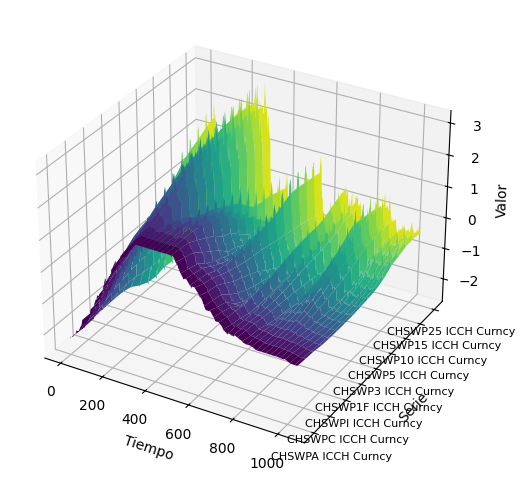

In [165]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

cols = df.columns[1:]
N = len(cols)

# tiempo numérico
if np.issubdtype(df.index.dtype, np.datetime64):
    t = (pd.to_datetime(df.index) - pd.to_datetime(df.index).min()).dt.total_seconds()/86400.0
else:
    t = np.arange(len(df), dtype=float)

# paleta continua y muestreo N colores equiespaciados
colors = px.colors.sample_colorscale('Viridis', [i/(N-1 if N>1 else 1) for i in range(N)])

fig = go.Figure()
for i, c in enumerate(cols):
    y = np.full(len(t), i, dtype=float)
    z = df[c].to_numpy()
    fig.add_trace(go.Scatter3d(
        x=t, y=y, z=z, mode='lines', name=str(c),
        line=dict(color=colors[i], width=4), opacity=0.95
    ))

fig.update_layout(
    width=1000, height=600,
    scene=dict(
        xaxis_title='Tiempo (días)',
        yaxis_title='Serie',
        zaxis_title='Valor',
        yaxis=dict(tickmode='array',
                   tickvals=list(range(N))[::max(1, N//8)],
                   ticktext=cols[::max(1, N//8)])
    ),
    legend=dict(orientation='h', y=-0.1)
)
fig.show()


In [147]:
TPM21 = pd.read_excel("tpm_2021.xls",engine="xlrd")
TPM22 = pd.read_excel("tpm_2022.xls",engine="xlrd")
TPM23 = pd.read_excel("tpm_2023.xls",engine="xlrd")
TPM24 = pd.read_excel("tpm_2024.xls",engine="xlrd")
TPM25 = pd.read_excel("tpm_2025.xls",engine="xlrd")

TPM_raw = pd.concat([TPM21, TPM22, TPM23, TPM24, TPM25], ignore_index=True)
TPM_raw = TPM_raw.dropna().reset_index(drop=True)
TPM_raw = TPM_raw.rename(columns={"Dia": "Fecha","Valor": "TPM"})
TPM_raw

Fecha   TPM
0    2021-01-04  0.50
1    2021-01-05  0.50
2    2021-01-06  0.50
3    2021-01-07  0.50
4    2021-01-08  0.50
...         ...   ...
1174 2025-09-22  4.75
1175 2025-09-23  4.75
1176 2025-09-24  4.75
1177 2025-09-25  4.75
1178 2025-09-26  4.75

[1179 rows x 2 columns]

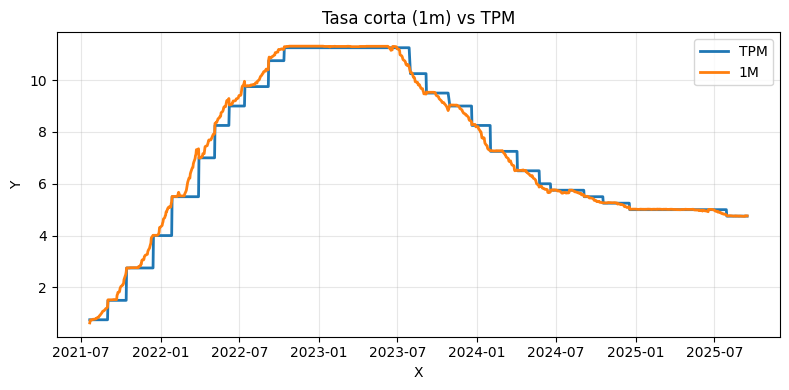

In [148]:
setA = set(TPM_raw["Fecha"])
setB = set(df["Fecha"])
x = sorted(setA & setB)


plt.figure(figsize=(8,4))
plt.plot(x, TPM_raw[TPM_raw["Fecha"].isin(x)]["TPM"], label="TPM", linewidth=2)
plt.plot(x, df[df["Fecha"].isin(x)][Tenor["1M"]], label="1M", linewidth=2)
plt.xlabel("X"); plt.ylabel("Y"); plt.title("Tasa corta (1m) vs TPM")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()